### 📊 Features and Target Variable

In our dataset, each row represents one student.  
We have several **features** (input variables) that describe the student, and one **target variable** (output) that we want to predict.

**Features:**
- **sex** (M/F): Gender of the student.
- **studytime** (1–4): Weekly study time.  
  - 1 = <2 hours, 2 = 2–5 hours, 3 = 5–10 hours, 4 = >10 hours
- **failures** (0–3): Number of past course failures.
- **absences**: Number of school absences.
- **G1** (0–20): First-period grade.
- **G2** (0–20): Second-period grade.
- **G3** (0–20): Final exam grade.

**Target:**
- **passed** (binary: 0 or 1): Did the student pass?  
  - `1` = passed (G3 ≥ 10)  
  - `0` = failed (G3 < 10)

👉 This is a **binary classification problem**: given the features (X), we want to predict the target (y).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

df= pd.read_csv("student_exam.csv")

df.head()

,student_id,sex,age,studytime,failures,absences,G1,G2,G3,passed
0,1,M,17,4,0,1,10,11,14,1
1,2,F,16,2,1,4,17,19,16,1
2,3,M,17,3,2,4,11,10,9,0
3,4,M,18,3,1,1,8,10,12,1
4,5,M,17,2,3,2,7,7,8,0


In [10]:
df.describe().round(3).T


,count,mean,std,min,25%,50%,75%,max
student_id,50.0,25.50,14.577,1.0,13.25,25.5,37.75,50.0
age,50.0,16.58,1.108,15.0,16.00,16.5,18.00,18.0
studytime,50.0,1.78,0.864,1.0,1.00,2.0,2.00,4.0
failures,50.0,1.18,1.173,0.0,0.00,1.0,2.00,3.0
absences,50.0,3.02,1.943,0.0,1.25,3.0,4.00,8.0
G1,50.0,11.38,3.063,5.0,10.00,11.0,13.75,18.0
G2,50.0,12.16,3.888,4.0,10.00,13.0,14.00,20.0
G3,50.0,10.34,2.967,3.0,8.25,10.0,12.00,16.0
passed,50.0,0.56,0.501,0.0,0.00,1.0,1.00,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  50 non-null     int64 
 1   sex         50 non-null     object
 2   age         50 non-null     int64 
 3   studytime   50 non-null     int64 
 4   failures    50 non-null     int64 
 5   absences    50 non-null     int64 
 6   G1          50 non-null     int64 
 7   G2          50 non-null     int64 
 8   G3          50 non-null     int64 
 9   passed      50 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.0+ KB


In [ ]:
#missing values
df.isnull().sum()


student_id    0
sex           0
age           0
studytime     0
failures      0
absences      0
G1            0
G2            0
G3            0
passed        0
dtype: int64

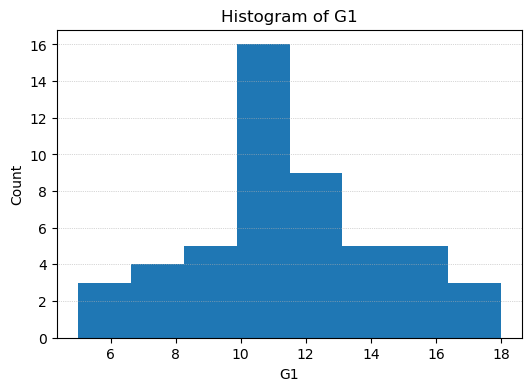

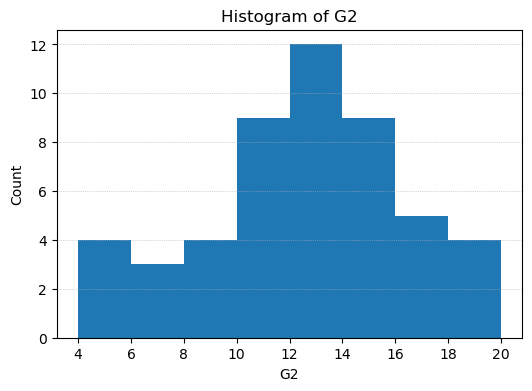

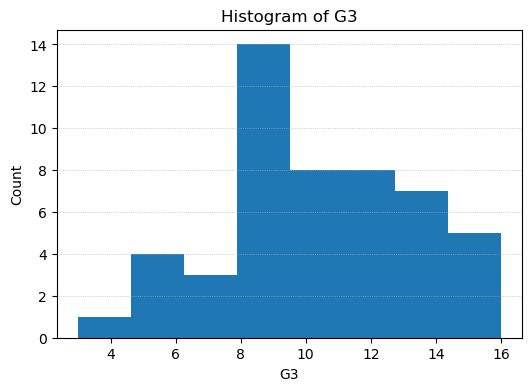

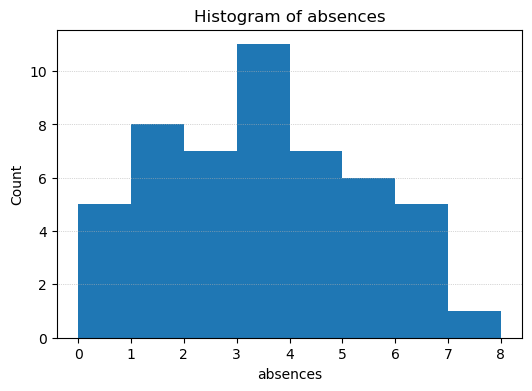

In [21]:
cols = ['G1','G2','G3','absences']
for c in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[c], bins=8)
    plt.title(f"Histogram of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.show()


studytime
1    23
2    17
3     8
4     2
Name: count, dtype: int64


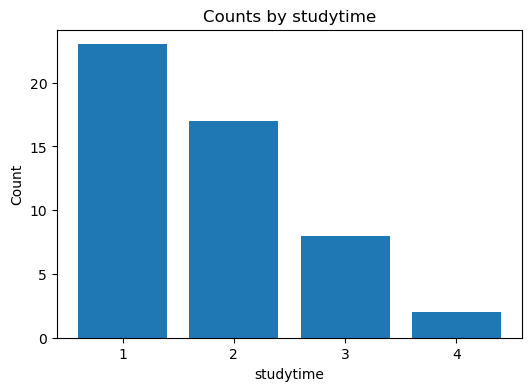

In [ ]:
# studytime counts
print(df['studytime'].value_counts().sort_index())

# failures and sex counts
plt.figure(figsize=(6,4))
vals = df['studytime'].value_counts().sort_index()
plt.bar(vals.index.astype(str), vals.values)
plt.title("Counts by studytime")
plt.xlabel("studytime")
plt.ylabel("Count")
plt.show()


           studytime  failures  absences     G1     G2     G3  passed
studytime      1.000    -0.182    -0.228 -0.060  0.059  0.404   0.337
failures      -0.182     1.000     0.133 -0.116 -0.033 -0.235  -0.210
absences      -0.228     0.133     1.000  0.095  0.062 -0.122  -0.096
G1            -0.060    -0.116     0.095  1.000  0.876  0.715   0.616
G2             0.059    -0.033     0.062  0.876  1.000  0.820   0.654
G3             0.404    -0.235    -0.122  0.715  0.820  1.000   0.816
passed         0.337    -0.210    -0.096  0.616  0.654  0.816   1.000


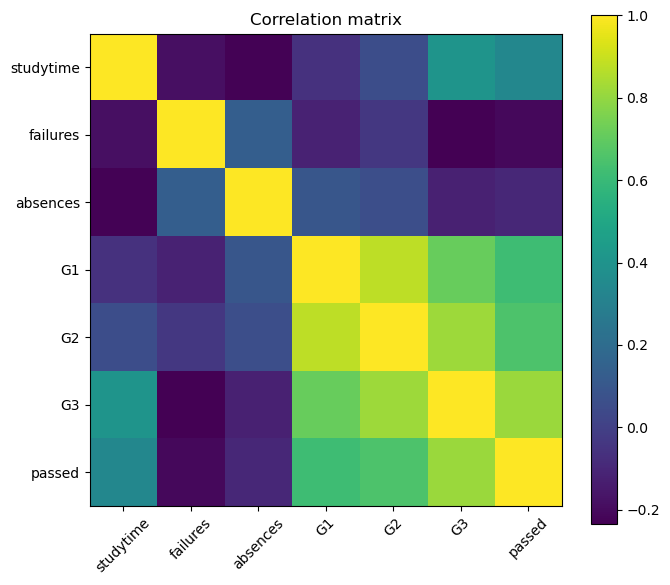

In [27]:
corr_cols = ['studytime','failures','absences','G1','G2','G3','passed']
corr = df[corr_cols].corr().round(3)
print(corr)

# heatmap
plt.figure(figsize=(7,6))
plt.imshow(corr.values, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [28]:
df.groupby('passed')[['G1','G2','G3','studytime','absences','failures']].mean().round(3)


,G1,G2,G3,studytime,absences,failures
passed,,,,,,
0,9.273,9.318,7.636,1.455,3.227,1.455
1,13.036,14.393,12.464,2.036,2.857,0.964


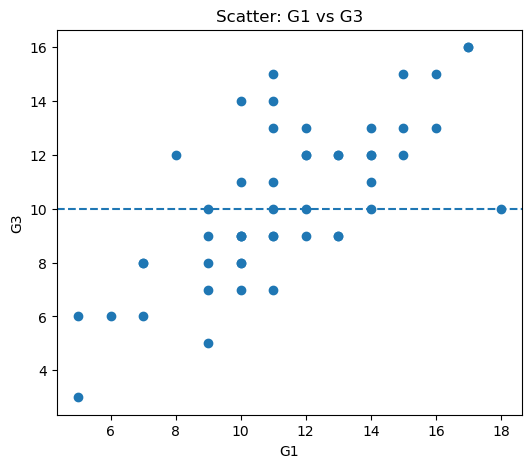

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['G1'], df['G3'])
plt.title("Scatter: G1 vs G3")
plt.xlabel("G1")
plt.ylabel("G3")
plt.axhline(10, linestyle='--')
plt.show()


In [ ]:

df['G_avg'] = (df['G1'] + df['G2']) / 2

df['studytime_label'] = df['studytime'].map({1:'<2h', 2:'2-5h', 3:'5-10h', 4:'>10h'})
df.head()


,student_id,sex,age,studytime,failures,absences,G1,G2,G3,passed,G_avg,studytime_label
0,1,M,17,4,0,1,10,11,14,1,10.5,>10h
1,2,F,16,2,1,4,17,19,16,1,18.0,2-5h
2,3,M,17,3,2,4,11,10,9,0,10.5,5-10h
3,4,M,18,3,1,1,8,10,12,1,9.0,5-10h
4,5,M,17,2,3,2,7,7,8,0,7.0,2-5h


In [31]:
df['passed'].value_counts()


passed
1    28
0    22
Name: count, dtype: int64